1. Handiling Missing data / null
2. Outlier Detection and Handling
3. Data scaling and Transformation
4. Encodign Cetegorical Vrables
5. Handling Duplictions
6. Dealing with inconsistent Data 

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
dataset = pd.read_csv(f"./data/Smartphones_cleaned_dataset.csv")

In [149]:

dataset.shape

(980, 26)

1. Handling Missing values


<function matplotlib.pyplot.show(close=None, block=None)>

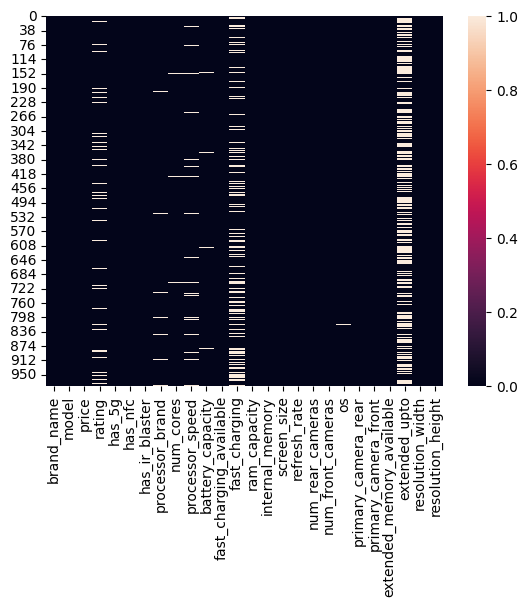

In [150]:
dataset.isnull().sum()
sns.heatmap(dataset.isnull())
plt.show


In [151]:
dataset.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [152]:
dataset.isnull().sum()
dataset = dataset.drop(['fast_charging', 'extended_upto'], axis=1)

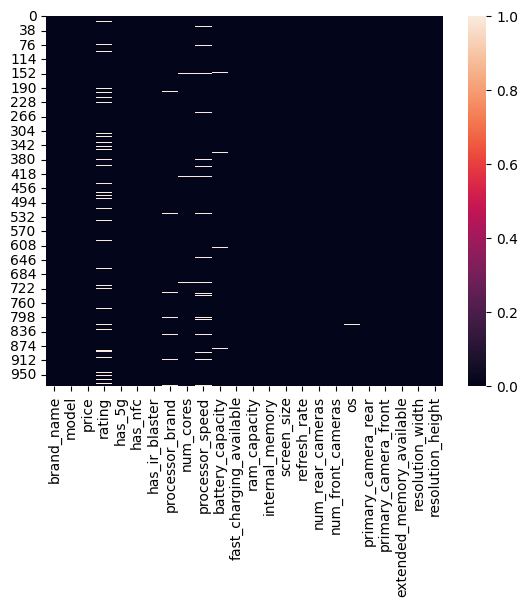

In [153]:
sns.heatmap(dataset.isnull())
plt.show()

In [154]:
dataset.head(4)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,3,1.0,android,50.0,16.0,0,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,3,1.0,android,64.0,16.0,1,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,3,1.0,android,50.0,13.0,1,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,6.55,120,3,1.0,android,50.0,16.0,1,1080,2400


In [155]:
dataset.describe().loc[['min', 'max']]

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height
min,3499.0,60.0,4.0,1.20,1821.0,0.0,1.0,8.0,3.54,60.0,1.0,1.0,2.0,0.3,0.0,480.0,480.0
max,650000.0,89.0,8.0,3.22,22000.0,1.0,18.0,1024.0,8.03,240.0,4.0,2.0,200.0,60.0,1.0,2460.0,3840.0


In [156]:
mode_column = ['processor_brand','num_cores','num_front_cameras' , 'os' , 'primary_camera_front']
mean_column = ['processor_speed','battery_capacity' , 'rating']

for i in mode_column:
     dataset[i].fillna(dataset[i].mode()[0],inplace= True)
for j in mean_column:
     dataset[j].fillna(dataset[j].mean(),inplace= True)

dataset.isnull().sum()

C:\Users\bhard\AppData\Local\Temp\ipykernel_20056\1588531237.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mode()[0],inplace= True)
C:\Users\bhard\AppData\Local\Temp\ipykernel_20056\1588531237.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

brand_name                   0
model                        0
price                        0
rating                       0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras            0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
resolution_width             0
resolution_height            0
dtype: int64

2. outliear detection and queare


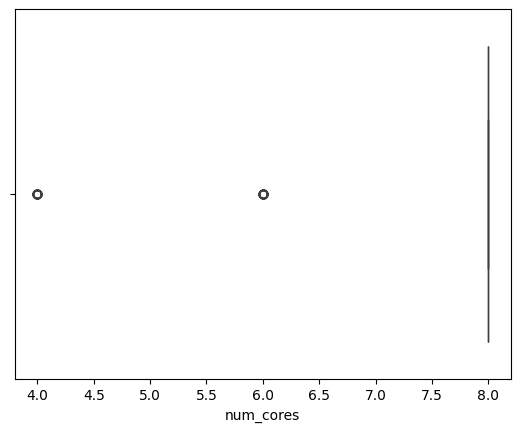

In [157]:
sns.boxplot(x = "num_cores"  , data= dataset)
plt.show()

In [158]:
# IQR(interquntile range)
# numeric_columns = dataset.select_dtypes(include=["int64" , "float64"]).columns
numeric_columns = ['battery_capacity' ,'price' ]
for i in numeric_columns:
     q1 = dataset[i].quantile(0.25) 
     q3 = dataset[i].quantile(0.75) 

     iqr = q3 - q1

     min_range = q1 - (1.5*iqr)
     max_range = q3 + (1.5*iqr)
     dataset = dataset[(dataset[i] >= min_range) & (dataset[i] <= max_range)]

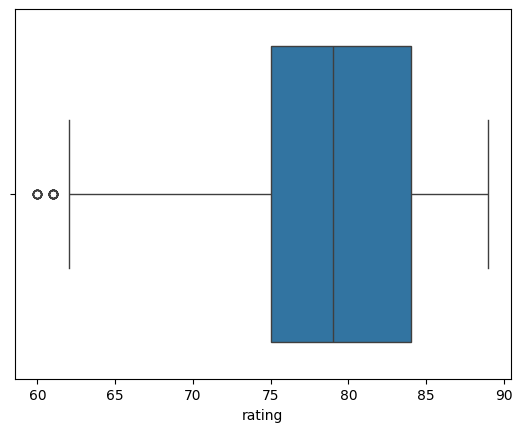

In [159]:
sns.boxplot(x = "rating"   , data= dataset)
plt.show()

In [160]:
dataset.head(1)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.7,120,3,1.0,android,50.0,16.0,0,1440,3216


Data scaling and Transformation

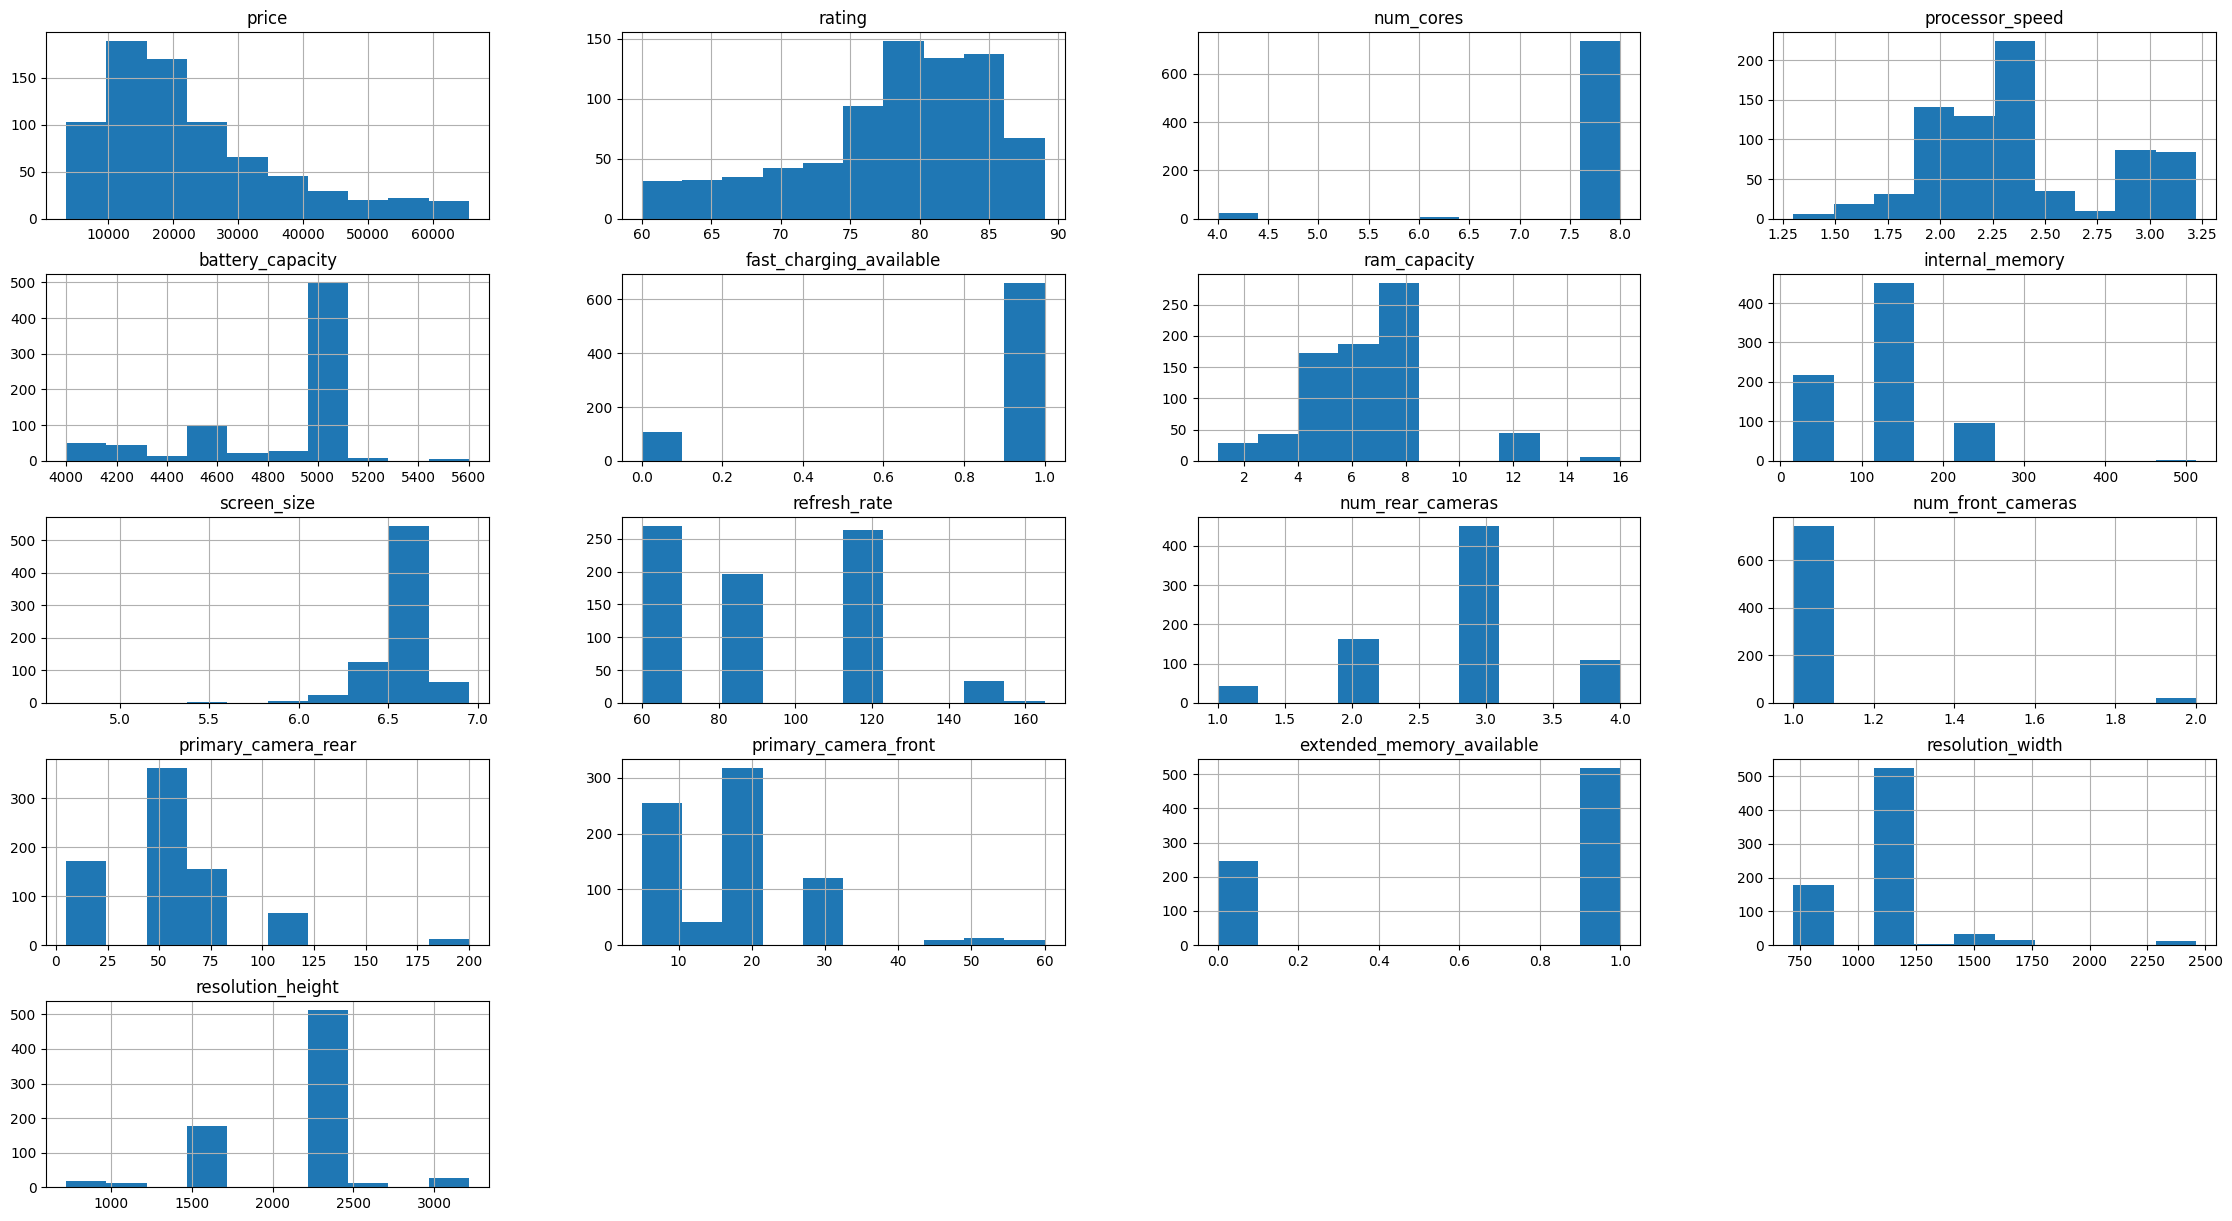

In [161]:
dataset.select_dtypes(include=['number']).hist(figsize=(28,15))
plt.show()


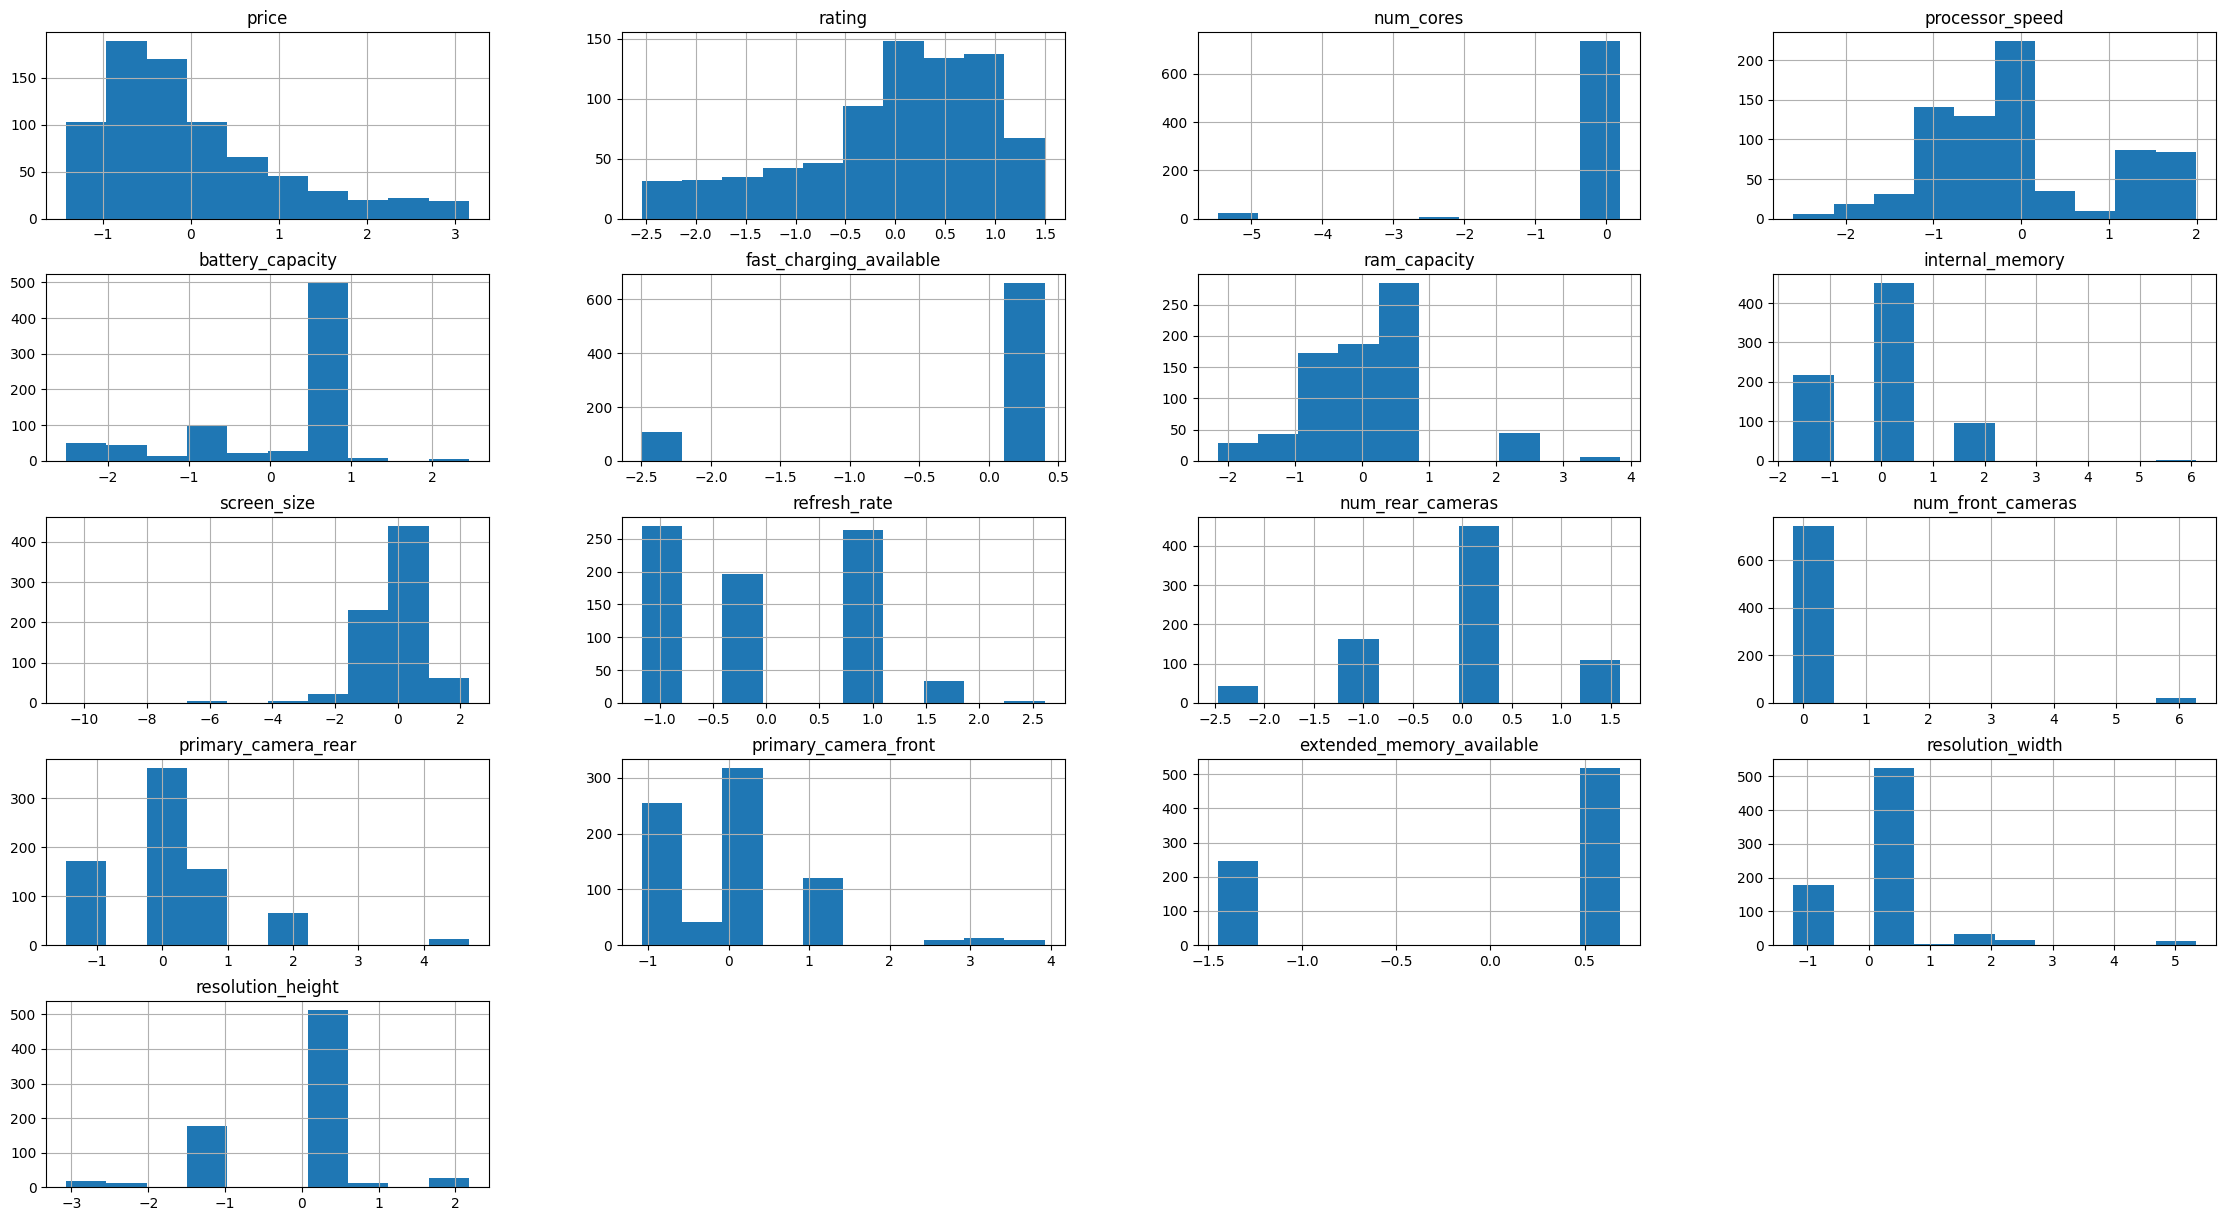

In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = dataset.select_dtypes(include=['number']).columns
dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])
dataset.select_dtypes(include=['number']).hist(figsize=(28,15))
plt.show()

4. Encodign cetegorical veriable

In [163]:
# OneHotEncoder yes/no

from sklearn.preprocessing import OneHotEncoder 
oh = OneHotEncoder()
colm = ['has_5g','has_nfc','has_ir_blaster']
arr = oh.fit_transform(dataset[colm])
encoded_dataset = pd.DataFrame(arr.toarray(),columns= oh.get_feature_names_out(colm)) 

dataset = dataset.drop(['has_5g','has_nfc','has_ir_blaster'],axis=1)

dataset = dataset.reset_index(drop=True)
encoded_dataset = encoded_dataset.reset_index(drop=True)
dataset = pd.concat([dataset, encoded_dataset], axis=1)
dataset.isnull().sum()

brand_name                   0
model                        0
price                        0
rating                       0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras            0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
resolution_width             0
resolution_height            0
has_5g_False                 0
has_5g_True                  0
has_nfc_False                0
has_nfc_True                 0
has_ir_blaster_False         0
has_ir_blaster_True          0
dtype: int64

In [164]:
dataset.head(2)

,brand_name,model,price,rating,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,...,primary_camera_front,extended_memory_available,resolution_width,resolution_height,has_5g_False,has_5g_True,has_nfc_False,has_nfc_True,has_ir_blaster_False,has_ir_blaster_True
0,oneplus,OnePlus 11 5G,2.382300,1.494242,snapdragon,0.196128,1.946061,0.586999,0.400757,2.245766,...,-0.078395,-1.449557,1.486256,2.175108,0.0,1.0,0.0,1.0,1.0,0.0
1,oneplus,OnePlus Nord CE 2 Lite 5G,-0.199468,0.381630,snapdragon,0.196128,-0.445312,0.586999,0.400757,-0.155151,...,-0.078395,0.689866,0.128220,0.486141,0.0,1.0,1.0,0.0,1.0,0.0


In [165]:
#ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder

# List of columns to encode
ordinal_cols = ['brand_name', 'processor_brand', 'os']

# Initialize the encoder
oe = OrdinalEncoder()

# Fit and transform the columns
dataset[ordinal_cols] = oe.fit_transform(dataset[ordinal_cols])

# Check the result
dataset.head()


,brand_name,model,price,rating,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,...,primary_camera_front,extended_memory_available,resolution_width,resolution_height,has_5g_False,has_5g_True,has_nfc_False,has_nfc_True,has_ir_blaster_False,has_ir_blaster_True
0,24.0,OnePlus 11 5G,2.382300,1.494242,7.0,0.196128,1.946061,0.586999,0.400757,2.245766,...,-0.078395,-1.449557,1.486256,2.175108,0.0,1.0,0.0,1.0,1.0,0.0
1,24.0,OnePlus Nord CE 2 Lite 5G,-0.199468,0.381630,7.0,0.196128,-0.445312,0.586999,0.400757,-0.155151,...,-0.078395,0.689866,0.128220,0.486141,0.0,1.0,1.0,0.0,1.0,0.0
2,29.0,Samsung Galaxy A14 5G,-0.456833,-0.452828,2.0,0.196128,0.032962,0.586999,0.400757,-0.955456,...,-0.351021,0.689866,0.128220,0.477738,0.0,1.0,1.0,0.0,1.0,0.0
3,20.0,Motorola Moto G62 5G,-0.567449,0.381630,7.0,0.196128,-0.445312,0.586999,0.400757,-0.155151,...,-0.078395,0.689866,0.128220,0.460932,0.0,1.0,1.0,0.0,1.0,0.0
4,27.0,Realme 10 Pro Plus,0.169988,0.520707,1.0,0.196128,0.511237,0.586999,0.400757,-0.155151,...,-0.078395,-1.449557,0.128220,0.486141,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
dataset  = dataset.drop(["model"] , axis=1)
# dataset.to_csv('Processed_Smartphones.csv' , index= False)